<h1>Indicadores dos BRICS feito pelo Banco Mundial</h1>
<br>
Dataset disponível no <a href='https://www.kaggle.com/docstein/brics-world-bank-indicators'>Kaggle</a>
<br>
Estes datasets possui informações sobre os indicadores socioeconômicos dos países emergentes do BRICS (Brasil, Rússia, India, China e África do Sul) de 1970 a 2019.
<br>
A pergunta principal que queremos responder é: Um povo <b>"mais educado"</b> é um povo que se preocupa com o meio ambiente? A renda per Capita aumentou na mesma proporção que o acesso a eletricidade, mostrando uma correlação? Quando a educação é elevada, a Renda per Capita também será? 

Vamos <b>primeiro</b> importar as bibliotecas que nos ajudará na exploração e visualização dos dados. Vamos, também abrir o arquivo e visualizar as primeiras 5 linhas. Outra conhecimento útil para nós será de quantas linhas e colunas há no Dataset e termos mais entendimento de cada coluna, como o tipo de dado e quantas linhas com informação (dados) há em cada.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Lendo os arquivos
economia = pd.read_csv('Economy_Data.csv', delimiter=';')
edu_e_meio_ambiente = pd.read_csv('EducationAndEnviron_Data.csv', delimiter=';')
saude_e_pobreza = pd.read_csv('HealthAndPoverty_Data.csv', delimiter=';')

In [3]:
# Visualizar primeiras 10 linhas de cada dataset
economia.head(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
6,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,China,CHN,1970.0,NaN
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
8,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Russian Federation,RUS,1970.0,NaN
9,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,South Africa,ZAF,1970.0,NaN


In [4]:
edu_e_meio_ambiente.head(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,1970.0,NaN
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,1970.0,NaN
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,1970.0,NaN
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,1970.0,NaN
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,1970.0,NaN
5,Access to electricity (% of population),EG.ELC.ACCS.ZS,Brazil,BRA,1970.0,NaN
6,Access to electricity (% of population),EG.ELC.ACCS.ZS,China,CHN,1970.0,NaN
7,Access to electricity (% of population),EG.ELC.ACCS.ZS,India,IND,1970.0,NaN
8,Access to electricity (% of population),EG.ELC.ACCS.ZS,Russian Federation,RUS,1970.0,NaN
9,Access to electricity (% of population),EG.ELC.ACCS.ZS,South Africa,ZAF,1970.0,NaN


In [5]:
saude_e_pobreza.head(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106
5,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,Brazil,BRA,1970.0,NaN
6,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,China,CHN,1970.0,NaN
7,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,India,IND,1970.0,NaN
8,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,Russian Federation,RUS,1970.0,NaN
9,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,South Africa,ZAF,1970.0,NaN


<h1>Entendendo nossos dados</h1>
<br>
Observamos que a coluna SeriesName possui dados informativos de um assunto específico relacionado àquele DataFrame, como por exemplo no conjunto de dados de educação e meio ambiente, que a linha 6 a 10, possui informação de acesso a eletricidade da população no ano de 1970 para cada país do BRICS.
<br>
<br>
Já que nossas perguntas são relacionados a assuntos específicos, vamos criar variáveis com as linhas que utilizaremos, criando um novo DataFrame para cada assunto específico e juntar com outro conjunto de dados que ajudará a responder a uma pergunta específica.

In [6]:
ensino_medio_completo = edu_e_meio_ambiente.loc[edu_e_meio_ambiente['SeriesCode'] == 'SE.SEC.CUAT.UP.ZS']
efeito_estufa = edu_e_meio_ambiente.loc[edu_e_meio_ambiente['SeriesCode'] == 'EN.ATM.GHGT.KT.CE']
efeito_estufa_per_capita = edu_e_meio_ambiente.loc[edu_e_meio_ambiente['SeriesCode'] == 'EN.ATM.CO2E.PC']
eletricidade = edu_e_meio_ambiente.loc[edu_e_meio_ambiente['SeriesCode'] == 'EG.ELC.ACCS.ZS']
crescimento_pib_per_capita = economia.loc[economia['SeriesCode'] == 'NY.GDP.PCAP.KD.ZG']
ensino_superior = edu_e_meio_ambiente.loc[edu_e_meio_ambiente['SeriesCode'] == 'SE.TER.CUAT.ST.ZS']

In [7]:
# Juntando os DataFrames para responder a primeira pergunta
pergunta1 = pd.merge(ensino_medio_completo, efeito_estufa, how='left', on=['Year', 'CountryCode'],suffixes=['_medio_completo', '_efeito_estufa'])
pergunta1.head()

,SeriesName_medio_completo,SeriesCode_medio_completo,CountryName_medio_completo,CountryCode,Year,Value_medio_completo,SeriesName_efeito_estufa,SeriesCode_efeito_estufa,CountryName_efeito_estufa,Value_efeito_estufa
0,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,1970.0,5.68445,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,1.260982e+06
1,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,1.873972e+06
2,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,7.464981e+05
3,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,2.240873e+06
4,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,South Africa,ZAF,1970.0,10.31528,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,South Africa,2.537697e+05


In [8]:
# Juntando os DataFrames para responder a segunda pergunta
pergunta2 = pd.merge(crescimento_pib_per_capita, eletricidade, how='left', on=['Year', 'CountryCode'],suffixes=['_pib', '_eletricidade'])
pergunta2.head()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_eletricidade,SeriesCode_eletricidade,CountryName_eletricidade,Value_eletricidade
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,1970.0,6.063485,Access to electricity (% of population),EG.ELC.ACCS.ZS,Brazil,NaN
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,1970.0,16.050399,Access to electricity (% of population),EG.ELC.ACCS.ZS,China,NaN
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,1970.0,2.864363,Access to electricity (% of population),EG.ELC.ACCS.ZS,India,NaN
3,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,1970.0,NaN,Access to electricity (% of population),EG.ELC.ACCS.ZS,Russian Federation,NaN
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,1970.0,2.512748,Access to electricity (% of population),EG.ELC.ACCS.ZS,South Africa,NaN


In [9]:
# Juntando os DataFrames para responder a terceira pergunta
pergunta3 = pd.merge(crescimento_pib_per_capita, ensino_superior, how='left', on=['Year', 'CountryCode'],suffixes=['_pib', '_ensino_superior'])
pergunta3.head()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_ensino_superior,SeriesCode_ensino_superior,CountryName_ensino_superior,Value_ensino_superior
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,1970.0,6.063485,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Brazil,NaN
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,1970.0,16.050399,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,China,NaN
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,1970.0,2.864363,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,India,NaN
3,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,1970.0,NaN,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Russian Federation,NaN
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,1970.0,2.512748,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,South Africa,3.66038


In [10]:
pergunta1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SeriesName_medio_completo   250 non-null    object 
 1   SeriesCode_medio_completo   250 non-null    object 
 2   CountryName_medio_completo  250 non-null    object 
 3   CountryCode                 250 non-null    object 
 4   Year                        250 non-null    float64
 5   Value_medio_completo        38 non-null     float64
 6   SeriesName_efeito_estufa    250 non-null    object 
 7   SeriesCode_efeito_estufa    250 non-null    object 
 8   CountryName_efeito_estufa   250 non-null    object 
 9   Value_efeito_estufa         204 non-null    float64
dtypes: float64(3), object(7)
memory usage: 21.5+ KB


In [11]:
pergunta2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeriesName_pib            250 non-null    object 
 1   SeriesCode_pib            250 non-null    object 
 2   CountryName_pib           250 non-null    object 
 3   CountryCode               250 non-null    object 
 4   Year                      250 non-null    float64
 5   Value_pib                 230 non-null    float64
 6   SeriesName_eletricidade   250 non-null    object 
 7   SeriesCode_eletricidade   250 non-null    object 
 8   CountryName_eletricidade  250 non-null    object 
 9   Value_eletricidade        126 non-null    float64
dtypes: float64(3), object(7)
memory usage: 21.5+ KB


In [12]:
pergunta3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeriesName_pib               250 non-null    object 
 1   SeriesCode_pib               250 non-null    object 
 2   CountryName_pib              250 non-null    object 
 3   CountryCode                  250 non-null    object 
 4   Year                         250 non-null    float64
 5   Value_pib                    230 non-null    float64
 6   SeriesName_ensino_superior   250 non-null    object 
 7   SeriesCode_ensino_superior   250 non-null    object 
 8   CountryName_ensino_superior  250 non-null    object 
 9   Value_ensino_superior        36 non-null     float64
dtypes: float64(3), object(7)
memory usage: 21.5+ KB


In [13]:
pergunta1.describe()

,Year,Value_medio_completo,Value_efeito_estufa
count,250.000000,38.000000,2.040000e+02
mean,1994.500000,42.760139,2.360967e+06
std,14.459818,19.545266,2.067554e+06
min,1970.000000,5.684450,2.504188e+05
25%,1982.000000,32.752204,1.139816e+06
50%,1994.500000,44.442333,1.936667e+06
75%,2007.000000,53.624469,2.951199e+06
max,2019.000000,89.076958,1.245471e+07


In [14]:
pergunta2.describe()

,Year,Value_pib,Value_eletricidade
count,250.000000,230.000000,126.000000
mean,1994.500000,3.090493,88.584794
std,14.459818,4.631012,14.531296
min,1970.000000,-14.613920,48.849533
25%,1982.000000,0.411592,81.150000
50%,1994.500000,2.907104,96.709052
75%,2007.000000,6.350794,100.000000
max,2019.000000,16.050399,100.000000


In [15]:
pergunta3.describe()

,Year,Value_pib,Value_ensino_superior
count,250.000000,230.000000,36.000000
mean,1994.500000,3.090493,11.332263
std,14.459818,4.631012,12.103799
min,1970.000000,-14.613920,1.354760
25%,1982.000000,0.411592,5.336668
50%,1994.500000,2.907104,8.726315
75%,2007.000000,6.350794,12.129018
max,2019.000000,16.050399,60.100899


In [16]:
# Verificando valores nulos nos DataFrames
pergunta1.isnull().sum()

SeriesName_medio_completo       0
SeriesCode_medio_completo       0
CountryName_medio_completo      0
CountryCode                     0
Year                            0
Value_medio_completo          212
SeriesName_efeito_estufa        0
SeriesCode_efeito_estufa        0
CountryName_efeito_estufa       0
Value_efeito_estufa            46
dtype: int64

In [17]:
pergunta2.isnull().sum()

SeriesName_pib                0
SeriesCode_pib                0
CountryName_pib               0
CountryCode                   0
Year                          0
Value_pib                    20
SeriesName_eletricidade       0
SeriesCode_eletricidade       0
CountryName_eletricidade      0
Value_eletricidade          124
dtype: int64

In [18]:
pergunta3.isnull().sum()

SeriesName_pib                   0
SeriesCode_pib                   0
CountryName_pib                  0
CountryCode                      0
Year                             0
Value_pib                       20
SeriesName_ensino_superior       0
SeriesCode_ensino_superior       0
CountryName_ensino_superior      0
Value_ensino_superior          214
dtype: int64

<h1>Limpando os dados</h1>
<br>
Utilizaremos um método interessante, que consiste em substituir pela <b>média dos valores num intervalo de dez anos</b>, ou seja, se há um valor nulo entre 1970 e 1980, ele será modificado pela média dessa década. 
<br>
Para isso, devemos criar uma categoria em cada DataFrame (pergunta1, pergunta2, pergunta3) que dividirá nosso conjunto em décadas. Os casos que não forem possíveis por falta de dados, excluíremos a década inteira da análise.

<h1>Categorizando os anos por década</h1>

In [19]:
bins = [1969, 1979, 1989, 1999, 2009, 2019]
group_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']
pergunta1['decadas'] = pd.cut(pergunta1['Year'], bins, labels=group_names)
pergunta1.head()

,SeriesName_medio_completo,SeriesCode_medio_completo,CountryName_medio_completo,CountryCode,Year,Value_medio_completo,SeriesName_efeito_estufa,SeriesCode_efeito_estufa,CountryName_efeito_estufa,Value_efeito_estufa,decadas
0,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,1970.0,5.68445,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,1.260982e+06,1970-1979
1,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,1.873972e+06,1970-1979
2,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,7.464981e+05,1970-1979
3,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,1970.0,NaN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,2.240873e+06,1970-1979
4,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,South Africa,ZAF,1970.0,10.31528,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,South Africa,2.537697e+05,1970-1979


In [20]:
bins = [1969, 1979, 1989, 1999, 2009, 2019]
group_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']
pergunta2['decadas'] = pd.cut(pergunta2['Year'], bins, labels=group_names)
pergunta2.head()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_eletricidade,SeriesCode_eletricidade,CountryName_eletricidade,Value_eletricidade,decadas
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,1970.0,6.063485,Access to electricity (% of population),EG.ELC.ACCS.ZS,Brazil,NaN,1970-1979
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,1970.0,16.050399,Access to electricity (% of population),EG.ELC.ACCS.ZS,China,NaN,1970-1979
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,1970.0,2.864363,Access to electricity (% of population),EG.ELC.ACCS.ZS,India,NaN,1970-1979
3,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,1970.0,NaN,Access to electricity (% of population),EG.ELC.ACCS.ZS,Russian Federation,NaN,1970-1979
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,1970.0,2.512748,Access to electricity (% of population),EG.ELC.ACCS.ZS,South Africa,NaN,1970-1979


In [21]:
bins = [1969, 1979, 1989, 1999, 2009, 2019]
group_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019']
pergunta3['decadas'] = pd.cut(pergunta3['Year'], bins, labels=group_names)
pergunta3.head()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_ensino_superior,SeriesCode_ensino_superior,CountryName_ensino_superior,Value_ensino_superior,decadas
0,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,1970.0,6.063485,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Brazil,NaN,1970-1979
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,1970.0,16.050399,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,China,NaN,1970-1979
2,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,1970.0,2.864363,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,India,NaN,1970-1979
3,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,1970.0,NaN,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Russian Federation,NaN,1970-1979
4,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,1970.0,2.512748,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,South Africa,3.66038,1970-1979


In [22]:
# Criando função que nos dará estatísticas descritivas
def stats(group):
    return {'min': group.min(), 'max': group.max(), 'contador':group.count(), 'media': group.mean(), 'mediana': group.median(), 'nulos':group.isnull().sum()}

<b>No caso da variável "Value_medio_completo", excluíremos tudo entre 1970 e 2000, e os valores nulos da China e Índia na década de 2000, utilizaremos a média de 2010-2019.</b>

In [23]:
pergunta1['Value_medio_completo'].groupby([pergunta1['decadas'], pergunta1['CountryCode']]).apply(stats).unstack()

min        max  contador      media    mediana  \
decadas   CountryCode                                                         
1970-1979 BRA           5.684450   5.684450       1.0   5.684450   5.684450   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS                NaN        NaN       0.0        NaN        NaN   
          ZAF          10.315280  10.315280       1.0  10.315280  10.315280   
1980-1989 BRA                NaN        NaN       0.0        NaN        NaN   
          CHN           6.647880   6.647880       1.0   6.647880   6.647880   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS                NaN        NaN       0.0        NaN        NaN   
          ZAF           8.244300  11.311260       2.0   9.777780   9.777780   
1990-1999 BRA                NaN        NaN       0.0        NaN        NaN   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS                NaN        NaN       0.0        NaN        NaN   
          ZAF                NaN        NaN       0.0        NaN        NaN   
2000-2009 BRA          29.416000  37.106880       5.0  33.628801  33.745571   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS          89.076958  89.076958       1.0  89.076958  89.076958   
          ZAF          26.976450  57.094452       9.0  48.859504  50.958729   
2010-2019 BRA          35.922680  47.432869       9.0  42.533521  42.561378   
          CHN          22.316000  22.316000       1.0  22.316000  22.316000   
          IND          26.888550  26.888550       1.0  26.888550  26.888550   
          RUS          84.987907  84.987907       1.0  84.987907  84.987907   
          ZAF          58.010281  64.624359       6.0  61.455242  61.427860   

                       nulos  
decadas   CountryCode         
1970-1979 BRA            9.0  
          CHN           10.0  
          IND           10.0  
          RUS           10.0  
          ZAF            9.0  
1980-1989 BRA           10.0  
          CHN            9.0  
          IND           10.0  
          RUS           10.0  
          ZAF            8.0  
1990-1999 BRA           10.0  
          CHN           10.0  
          IND           10.0  
          RUS           10.0  
          ZAF           10.0  
2000-2009 BRA            5.0  
          CHN           10.0  
          IND           10.0  
          RUS            9.0  
          ZAF            1.0  
2010-2019 BRA            1.0  
          CHN            9.0  
          IND            9.0  
          RUS            9.0  
          ZAF            4.0

<b>A variável "Value_efeito_estufa" será utilizado apenas a partir de 2000, por causa da variável anterior ("Value_ensino_medio") e contaremos com a média de 2000-2009 para a África do Sul para os anos 2010-2019.</b>

In [24]:
pergunta1['Value_efeito_estufa'].groupby([pergunta1['decadas'], pergunta1['CountryCode']]).apply(stats).unstack()

min           max  contador         media  \
decadas   CountryCode                                                       
1970-1979 BRA          9.685525e+05  1.415029e+06      10.0  1.201999e+06   
          CHN          1.873972e+06  2.773804e+06      10.0  2.252790e+06   
          IND          7.464981e+05  9.054526e+05      10.0  8.170419e+05   
          RUS          2.240873e+06  2.964556e+06      10.0  2.609409e+06   
          ZAF          2.504188e+05  3.097654e+05      10.0  2.798016e+05   
1980-1989 BRA          1.260054e+06  1.612857e+06      10.0  1.432753e+06   
          CHN          2.724309e+06  3.800686e+06      10.0  3.163945e+06   
          IND          9.294148e+05  1.365391e+06      10.0  1.131006e+06   
          RUS          3.028838e+06  3.390141e+06      10.0  3.175792e+06   
          ZAF          2.998569e+05  3.118480e+05       4.0  3.072374e+05   
1990-1999 BRA          1.455453e+06  2.263726e+06      10.0  1.674866e+06   
          CHN          3.892675e+06  5.181881e+06      10.0  4.667079e+06   
          IND          1.387372e+06  1.956039e+06      10.0  1.626670e+06   
          RUS          2.457480e+06  3.593582e+06      10.0  2.962865e+06   
          ZAF          3.433911e+05  4.578959e+05      10.0  3.796758e+05   
2000-2009 BRA          1.211969e+06  2.703499e+06      10.0  1.713974e+06   
          CHN          5.082326e+06  1.061726e+07      10.0  7.518663e+06   
          IND          1.875601e+06  2.594640e+06      10.0  2.151046e+06   
          RUS          2.413521e+06  3.542027e+06      10.0  2.779929e+06   
          ZAF          4.160312e+05  5.021303e+05       8.0  4.600164e+05   
2010-2019 BRA          2.902243e+06  2.989418e+06       3.0  2.948234e+06   
          CHN          1.118381e+07  1.245471e+07       3.0  1.190093e+07   
          IND          2.771457e+06  3.002895e+06       3.0  2.867733e+06   
          RUS          2.603290e+06  2.803398e+06       3.0  2.728137e+06   
          ZAF                   NaN           NaN       0.0           NaN   

                            mediana  nulos  
decadas   CountryCode                       
1970-1979 BRA          1.193824e+06    0.0  
          CHN          2.169139e+06    0.0  
          IND          8.120917e+05    0.0  
          RUS          2.612112e+06    0.0  
          ZAF          2.812499e+05    0.0  
1980-1989 BRA          1.449962e+06    0.0  
          CHN          3.139340e+06    0.0  
          IND          1.129055e+06    0.0  
          RUS          3.130613e+06    0.0  
          ZAF          3.086224e+05    6.0  
1990-1999 BRA          1.609985e+06    0.0  
          CHN          4.827919e+06    0.0  
          IND          1.616266e+06    0.0  
          RUS          2.866266e+06    0.0  
          ZAF          3.635119e+05    0.0  
2000-2009 BRA          1.606453e+06    0.0  
          CHN          7.460089e+06    0.0  
          IND          2.103898e+06    0.0  
          RUS          2.699098e+06    0.0  
          ZAF          4.645240e+05    2.0  
2010-2019 BRA          2.953041e+06    7.0  
          CHN          1.206426e+07    7.0  
          IND          2.828846e+06    7.0  
          RUS          2.777724e+06    7.0  
          ZAF                   NaN   10.0

<b>Para a variável referente a eletricidade, usaremos a partir da década de 90, usufruindo da média dos anos 2000 para a China nos anos 90.</b>

In [25]:
pergunta2['Value_eletricidade'].groupby([pergunta2['decadas'], pergunta1['CountryCode']]).apply(stats).unstack()

min         max  contador       media  \
decadas   CountryCode                                                 
1970-1979 BRA                 NaN         NaN       0.0         NaN   
          CHN                 NaN         NaN       0.0         NaN   
          IND                 NaN         NaN       0.0         NaN   
          RUS                 NaN         NaN       0.0         NaN   
          ZAF                 NaN         NaN       0.0         NaN   
1980-1989 BRA                 NaN         NaN       0.0         NaN   
          CHN                 NaN         NaN       0.0         NaN   
          IND                 NaN         NaN       0.0         NaN   
          RUS                 NaN         NaN       0.0         NaN   
          ZAF                 NaN         NaN       0.0         NaN   
1990-1999 BRA           87.475116   94.762960      10.0   91.481616   
          CHN                 NaN         NaN       0.0         NaN   
          IND           48.849533   60.100000       7.0   53.194069   
          RUS          100.000000  100.000000      10.0  100.000000   
          ZAF           57.600000   70.677788       4.0   65.424448   
2000-2009 BRA           94.412773   98.856938      10.0   97.102427   
          CHN           96.907104   99.151222      10.0   98.101707   
          IND           55.800000   75.000000      10.0   65.904500   
          RUS          100.000000  100.000000      10.0  100.000000   
          ZAF           70.200000   82.700000      10.0   78.695089   
2010-2019 BRA           98.976738  100.000000       9.0   99.606803   
          CHN           99.700000  100.000000       9.0   99.949918   
          IND           67.600000   95.235855       9.0   83.737115   
          RUS           95.500000  100.000000       9.0   99.500000   
          ZAF           82.900000   91.229874       9.0   85.514430   

                          mediana  nulos  
decadas   CountryCode                     
1970-1979 BRA                 NaN   10.0  
          CHN                 NaN   10.0  
          IND                 NaN   10.0  
          RUS                 NaN   10.0  
          ZAF                 NaN   10.0  
1980-1989 BRA                 NaN   10.0  
          CHN                 NaN   10.0  
          IND                 NaN   10.0  
          RUS                 NaN   10.0  
          ZAF                 NaN   10.0  
1990-1999 BRA           91.627525    0.0  
          CHN                 NaN   10.0  
          IND           52.268871    3.0  
          RUS          100.000000    0.0  
          ZAF           66.710002    6.0  
2000-2009 BRA           97.036805    0.0  
          CHN           98.162556    0.0  
          IND           65.921718    0.0  
          RUS          100.000000    0.0  
          ZAF           80.800000    0.0  
2010-2019 BRA           99.650247    1.0  
          CHN          100.000000    1.0  
          IND           83.534721    1.0  
          RUS          100.000000    1.0  
          ZAF           85.300000    1.0

<b>Já referente ao valor do PIB per Capita, como a variável de eletricidade terá apenas os dados a partir dos anos 90 sendo utilizados, não será necessário tratar os dados do PIB per Capita para a pergunta 2 e nem para a pergunta 3, pois a variável ensino superior da pergunta seguinte teremos dados somente a partir dos anos 2000.</b>

In [26]:
pergunta2['Value_pib'].groupby([pergunta2['decadas'], pergunta1['CountryCode']]).apply(stats).unstack()

min        max  contador     media   mediana  \
decadas   CountryCode                                                       
1970-1979 BRA           0.814360  11.303519      10.0  5.903709  6.278793   
          CHN          -3.081322  16.050399      10.0  5.291481  5.720647   
          IND          -7.388104   6.644907      10.0  0.594608  0.146412   
          RUS                NaN        NaN       0.0       NaN       NaN   
          ZAF          -2.523785   3.347521      10.0  0.620147  0.869889   
1980-1989 BRA          -6.618771   6.565576      10.0  0.785523  1.463347   
          CHN           2.600704  13.638334      10.0  8.173349  8.293574   
          IND           1.093954   7.299421      10.0  3.338745  3.236830   
          RUS                NaN        NaN       0.0       NaN       NaN   
          ZAF          -4.517205   3.897088      10.0 -0.343399 -0.127097   
1990-1999 BRA          -4.841871   3.627585      10.0  0.225540  0.168997   
          CHN           2.393612  12.824945      10.0  8.757720  8.450367   
          IND          -0.983575   6.898116      10.0  3.741521  3.819632   
          RUS         -14.613920   6.729496      10.0 -4.883865 -4.632945   
          ZAF          -4.550333   2.311697      10.0 -0.719567 -0.140054   
2000-2009 BRA          -1.081944   4.974705      10.0  2.181704  2.430531   
          CHN           7.555802  13.636345      10.0  9.683089  9.223118   
          IND           1.587598   6.403285      10.0  4.602279  6.070940   
          RUS          -7.827749  10.463718      10.0  5.807942  7.219549   
          ZAF          -2.898731   4.277783      10.0  2.265874  2.570017   
2010-2019 BRA          -4.351484   6.524373      10.0  0.531467  0.517246   
          CHN           5.730121  10.103101      10.0  7.170271  6.690656   
          IND           3.893930   7.082848      10.0  5.520339  5.523677   
          RUS          -2.183888   4.453094      10.0  1.650575  1.624177   
          ZAF          -1.179143   1.720714      10.0  0.182279  0.122070   

                       nulos  
decadas   CountryCode         
1970-1979 BRA            0.0  
          CHN            0.0  
          IND            0.0  
          RUS           10.0  
          ZAF            0.0  
1980-1989 BRA            0.0  
          CHN            0.0  
          IND            0.0  
          RUS           10.0  
          ZAF            0.0  
1990-1999 BRA            0.0  
          CHN            0.0  
          IND            0.0  
          RUS            0.0  
          ZAF            0.0  
2000-2009 BRA            0.0  
          CHN            0.0  
          IND            0.0  
          RUS            0.0  
          ZAF            0.0  
2010-2019 BRA            0.0  
          CHN            0.0  
          IND            0.0  
          RUS            0.0  
          ZAF            0.0

<b>E finalmente para a variável de ensino superior, aproveitaremos os dados a partir dos anos 2000 e os dados nulos da China e Índia nos anos 2000 serão tratados pela média dos anos 2010 destes países.</b>

In [27]:
pergunta3['Value_ensino_superior'].groupby([pergunta3['decadas'], pergunta1['CountryCode']]).apply(stats).unstack()

min        max  contador      media    mediana  \
decadas   CountryCode                                                         
1970-1979 BRA                NaN        NaN       0.0        NaN        NaN   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS                NaN        NaN       0.0        NaN        NaN   
          ZAF           3.660380   3.660380       1.0   3.660380   3.660380   
1980-1989 BRA                NaN        NaN       0.0        NaN        NaN   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS          14.100000  14.100000       1.0  14.100000  14.100000   
          ZAF           1.354760   2.300020       2.0   1.827390   1.827390   
1990-1999 BRA                NaN        NaN       0.0        NaN        NaN   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS                NaN        NaN       0.0        NaN        NaN   
          ZAF                NaN        NaN       0.0        NaN        NaN   
2000-2009 BRA           8.114640  10.596870       5.0   9.339972   9.332700   
          CHN                NaN        NaN       0.0        NaN        NaN   
          IND                NaN        NaN       0.0        NaN        NaN   
          RUS          55.428150  55.428150       1.0  55.428150  55.428150   
          ZAF           4.166170   5.834300       8.0   4.795498   4.702345   
2010-2019 BRA          11.299400  16.543390       9.0  13.519867  13.157370   
          CHN           8.812040   8.812040       1.0   8.812040   8.812040   
          IND           9.893010   9.893010       1.0   9.893010   9.893010   
          RUS          60.100899  60.100899       1.0  60.100899  60.100899   
          ZAF           6.142480  11.833540       6.0   7.594925   6.793630   

                       nulos  
decadas   CountryCode         
1970-1979 BRA           10.0  
          CHN           10.0  
          IND           10.0  
          RUS           10.0  
          ZAF            9.0  
1980-1989 BRA           10.0  
          CHN           10.0  
          IND           10.0  
          RUS            9.0  
          ZAF            8.0  
1990-1999 BRA           10.0  
          CHN           10.0  
          IND           10.0  
          RUS           10.0  
          ZAF           10.0  
2000-2009 BRA            5.0  
          CHN           10.0  
          IND           10.0  
          RUS            9.0  
          ZAF            2.0  
2010-2019 BRA            1.0  
          CHN            9.0  
          IND            9.0  
          RUS            9.0  
          ZAF            4.0

<h1>Tratamento dos dados</h1>
<br>
<br>
Pode até não ser a maneira ideal para tratamento dos dados, mas decidi dividir o DataFrame para cada país e década, para tratar cada caso e depois juntar novamente em um só. Esta tarefa será feita para todos. 
<br>
Além disso, colocaremos a variável ano como um inteiro.

In [28]:
# Pegando os dados a partir dos anos que nos interessa
pergunta1 = pergunta1[pergunta1['Year'] >= 2000]
pergunta2 = pergunta2[pergunta2['Year'] >= 1990]
pergunta3 = pergunta3[pergunta3['Year'] >= 2000]

In [29]:
# Tratando valores nulos do valor Ensino Médio
CHN_ensino_medio = pergunta1[(pergunta1['CountryCode'] == 'CHN')]
CHN_ensino_medio['Value_medio_completo'].fillna(22.316000, inplace=True)
IND_ensino_medio = pergunta1[(pergunta1['CountryCode'] == 'IND')]
IND_ensino_medio['Value_medio_completo'].fillna(26.888550, inplace=True)
BRA_ensino_medio_antes_2010 = pergunta1[(pergunta1['CountryCode'] == 'BRA') & (pergunta1['Year'] < 2010)]
BRA_ensino_medio_antes_2010['Value_medio_completo'].fillna(33.628801, inplace=True)
RUS_ensino_medio_antes_2010 = pergunta1[(pergunta1['CountryCode'] == 'RUS') & (pergunta1['Year'] < 2010)]
RUS_ensino_medio_antes_2010['Value_medio_completo'].fillna(89.076958, inplace=True)
ZAF_ensino_medio_antes_2010 = pergunta1[(pergunta1['CountryCode'] == 'ZAF') & (pergunta1['Year'] < 2010)]
ZAF_ensino_medio_antes_2010['Value_medio_completo'].fillna(48.859504, inplace=True)
BRA_ensino_medio_depois_2010 = pergunta1[(pergunta1['CountryCode'] == 'BRA') & (pergunta1['Year'] >= 2010)]
BRA_ensino_medio_depois_2010['Value_medio_completo'].fillna(42.533521, inplace=True)
RUS_ensino_medio_depois_2010 = pergunta1[(pergunta1['CountryCode'] == 'RUS') & (pergunta1['Year'] >= 2010)]
RUS_ensino_medio_depois_2010['Value_medio_completo'].fillna(84.987907, inplace=True)
ZAF_ensino_medio_depois_2010 = pergunta1[(pergunta1['CountryCode'] == 'ZAF') & (pergunta1['Year'] >= 2010)]
ZAF_ensino_medio_depois_2010['Value_medio_completo'].fillna(61.455242, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [30]:
pergunta1_ensino_medio = pd.concat([CHN_ensino_medio, IND_ensino_medio, BRA_ensino_medio_antes_2010, RUS_ensino_medio_antes_2010, ZAF_ensino_medio_antes_2010, BRA_ensino_medio_depois_2010, RUS_ensino_medio_depois_2010, ZAF_ensino_medio_depois_2010])
pergunta1_ensino_medio.sort_index()

,SeriesName_medio_completo,SeriesCode_medio_completo,CountryName_medio_completo,CountryCode,Year,Value_medio_completo,SeriesName_efeito_estufa,SeriesCode_efeito_estufa,CountryName_efeito_estufa,Value_efeito_estufa,decadas
150,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,2000.0,33.628801,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,1222630.430,2000-2009
151,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,2000.0,22.316000,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,5082325.600,2000-2009
152,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,2000.0,26.888550,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,1885189.000,2000-2009
153,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,2000.0,89.076958,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,2771222.000,2000-2009
154,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,South Africa,ZAF,2000.0,48.859504,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,South Africa,420482.753,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...
245,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,2019.0,42.533521,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,NaN,2010-2019
246,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,2019.0,22.316000,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,NaN,2010-2019
247,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,2019.0,26.888550,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,NaN,2010-2019
248,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,2019.0,84.987907,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,NaN,2010-2019


In [31]:
# Tratando valores nulos do valor Efeito Estufa
ZAF_efeito_estufa_antes_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'ZAF') & (pergunta1_ensino_medio['Year'] < 2010)]
ZAF_efeito_estufa_antes_2010['Value_efeito_estufa'].fillna(4.600164, inplace=True)
BRA_efeito_estufa_antes_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'BRA') & (pergunta1_ensino_medio['Year'] < 2010)]
CHN_efeito_estufa_antes_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'CHN') & (pergunta1_ensino_medio['Year'] < 2010)]
IND_efeito_estufa_antes_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'IND') & (pergunta1_ensino_medio['Year'] < 2010)]
RUS_efeito_estufa_antes_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'RUS') & (pergunta1_ensino_medio['Year'] < 2010)]
BRA_efeito_estufa_depois_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'BRA') & (pergunta1_ensino_medio['Year'] >= 2010)]
BRA_efeito_estufa_depois_2010['Value_efeito_estufa'].fillna(2.948234, inplace=True)
CHN_efeito_estufa_depois_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'CHN') & (pergunta1_ensino_medio['Year'] >= 2010)]
CHN_efeito_estufa_depois_2010['Value_efeito_estufa'].fillna(1.190093, inplace=True)
IND_efeito_estufa_depois_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'IND') & (pergunta1_ensino_medio['Year'] >= 2010)]
IND_efeito_estufa_depois_2010['Value_efeito_estufa'].fillna(2.867733, inplace=True)
RUS_efeito_estufa_depois_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'RUS') & (pergunta1_ensino_medio['Year'] >= 2010)]
RUS_efeito_estufa_depois_2010['Value_efeito_estufa'].fillna(2.728137, inplace=True)
ZAF_efeito_estufa_depois_2010 = pergunta1_ensino_medio[(pergunta1_ensino_medio['CountryCode'] == 'ZAF') & (pergunta1_ensino_medio['Year'] >= 2010)]
ZAF_efeito_estufa_depois_2010['Value_efeito_estufa'].fillna(4.600164, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
pergunta1 = pd.concat([ZAF_efeito_estufa_antes_2010, BRA_efeito_estufa_antes_2010, CHN_efeito_estufa_antes_2010, IND_efeito_estufa_antes_2010, RUS_efeito_estufa_antes_2010, BRA_efeito_estufa_depois_2010, CHN_efeito_estufa_depois_2010, IND_efeito_estufa_depois_2010, RUS_efeito_estufa_depois_2010, ZAF_efeito_estufa_depois_2010])
pergunta1['Year'] = pergunta1['Year'].astype('int64')
pergunta1.sort_index()

,SeriesName_medio_completo,SeriesCode_medio_completo,CountryName_medio_completo,CountryCode,Year,Value_medio_completo,SeriesName_efeito_estufa,SeriesCode_efeito_estufa,CountryName_efeito_estufa,Value_efeito_estufa,decadas
150,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,2000,33.628801,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,1.222630e+06,2000-2009
151,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,2000,22.316000,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,5.082326e+06,2000-2009
152,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,2000,26.888550,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,1.885189e+06,2000-2009
153,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,2000,89.076958,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,2.771222e+06,2000-2009
154,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,South Africa,ZAF,2000,48.859504,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,South Africa,4.204828e+05,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...
245,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Brazil,BRA,2019,42.533521,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Brazil,2.948234e+00,2010-2019
246,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,China,CHN,2019,22.316000,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,China,1.190093e+00,2010-2019
247,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,India,IND,2019,26.888550,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,India,2.867733e+00,2010-2019
248,"Educational attainment, at least completed upp...",SE.SEC.CUAT.UP.ZS,Russian Federation,RUS,2019,84.987907,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,Russian Federation,2.728137e+00,2010-2019


In [33]:
# Tratando valores nulos do valor Eletricidade
BRA_eletricidade_1990_a_1999 = pergunta2[(pergunta2['CountryCode'] == 'BRA') & (pergunta2['Year'] < 2000)]
CHN_eletricidade_1990_a_1999 = pergunta2[(pergunta2['CountryCode'] == 'CHN') & (pergunta2['Year'] < 2000)]
CHN_eletricidade_1990_a_1999['Value_eletricidade'].fillna(98.101707, inplace=True)
IND_eletricidade_1990_a_1999 = pergunta2[(pergunta2['CountryCode'] == 'IND') & (pergunta2['Year'] < 2000)]
IND_eletricidade_1990_a_1999['Value_eletricidade'].fillna(53.194069, inplace=True)
RUS_eletricidade_1990_a_1999 = pergunta2[(pergunta2['CountryCode'] == 'RUS') & (pergunta2['Year'] < 2000)]
ZAF_eletricidade_1990_a_1999 = pergunta2[(pergunta2['CountryCode'] == 'ZAF') & (pergunta2['Year'] < 2000)]
ZAF_eletricidade_1990_a_1999['Value_eletricidade'].fillna(65.424448, inplace=True)
BRA_eletricidade_2000_a_2009 = pergunta2[(pergunta2['CountryCode'] == 'BRA') & (pergunta2['Year'] >= 2000) & (pergunta2['Year'] < 2010)]
CHN_eletricidade_2000_a_2009 = pergunta2[(pergunta2['CountryCode'] == 'CHN') & (pergunta2['Year'] >= 2000) & (pergunta2['Year'] < 2010)]
IND_eletricidade_2000_a_2009 = pergunta2[(pergunta2['CountryCode'] == 'IND') & (pergunta2['Year'] >= 2000) & (pergunta2['Year'] < 2010)]
RUS_eletricidade_2000_a_2009 = pergunta2[(pergunta2['CountryCode'] == 'RUS') & (pergunta2['Year'] >= 2000) & (pergunta2['Year'] < 2010)]
ZAF_eletricidade_2000_a_2009 = pergunta2[(pergunta2['CountryCode'] == 'ZAF') & (pergunta2['Year'] >= 2000) & (pergunta2['Year'] < 2010)]
BRA_eletricidade_depois_2010 = pergunta2[(pergunta2['CountryCode'] == 'BRA') & (pergunta2['Year'] >= 2010)]
BRA_eletricidade_depois_2010['Value_eletricidade'].fillna(99.606803, inplace=True)
CHN_eletricidade_depois_2010 = pergunta2[(pergunta2['CountryCode'] == 'CHN') & (pergunta2['Year'] >= 2010)]
CHN_eletricidade_depois_2010['Value_eletricidade'].fillna(99.949918, inplace=True)
IND_eletricidade_depois_2010 = pergunta2[(pergunta2['CountryCode'] == 'IND') & (pergunta2['Year'] >= 2010)]
IND_eletricidade_depois_2010['Value_eletricidade'].fillna(83.737115, inplace=True)
RUS_eletricidade_depois_2010 = pergunta2[(pergunta2['CountryCode'] == 'RUS') & (pergunta2['Year'] >= 2010)]
RUS_eletricidade_depois_2010['Value_eletricidade'].fillna(99.5, inplace=True)
ZAF_eletricidade_depois_2010 = pergunta2[(pergunta2['CountryCode'] == 'ZAF') & (pergunta2['Year'] >= 2010)]
ZAF_eletricidade_depois_2010['Value_eletricidade'].fillna(85.514430, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
pergunta2 = pd.concat([BRA_eletricidade_1990_a_1999, CHN_eletricidade_1990_a_1999, IND_eletricidade_1990_a_1999, RUS_eletricidade_1990_a_1999, ZAF_eletricidade_1990_a_1999, BRA_eletricidade_2000_a_2009, CHN_eletricidade_2000_a_2009, IND_eletricidade_2000_a_2009, RUS_eletricidade_2000_a_2009, ZAF_eletricidade_2000_a_2009, BRA_eletricidade_depois_2010, CHN_eletricidade_depois_2010, IND_eletricidade_depois_2010, RUS_eletricidade_depois_2010, ZAF_eletricidade_depois_2010])
pergunta2['Year'] = pergunta2['Year'].astype('int64')
pergunta2.sort_index()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_eletricidade,SeriesCode_eletricidade,CountryName_eletricidade,Value_eletricidade,decadas
100,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,1990,-4.841871,Access to electricity (% of population),EG.ELC.ACCS.ZS,Brazil,87.475116,1990-1999
101,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,1990,2.393612,Access to electricity (% of population),EG.ELC.ACCS.ZS,China,98.101707,1990-1999
102,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,1990,3.365073,Access to electricity (% of population),EG.ELC.ACCS.ZS,India,53.194069,1990-1999
103,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,1990,-3.162837,Access to electricity (% of population),EG.ELC.ACCS.ZS,Russian Federation,100.000000,1990-1999
104,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,1990,-2.675614,Access to electricity (% of population),EG.ELC.ACCS.ZS,South Africa,65.424448,1990-1999
...,...,...,...,...,...,...,...,...,...,...,...
245,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,2019,0.379344,Access to electricity (% of population),EG.ELC.ACCS.ZS,Brazil,99.606803,2010-2019
246,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,2019,5.730121,Access to electricity (% of population),EG.ELC.ACCS.ZS,China,99.949918,2010-2019
247,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,2019,3.963163,Access to electricity (% of population),EG.ELC.ACCS.ZS,India,83.737115,2010-2019
248,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,2019,1.410731,Access to electricity (% of population),EG.ELC.ACCS.ZS,Russian Federation,99.500000,2010-2019


In [35]:
# Tratando valores nulos do valor Ensino Superior
BRA_ensino_superior_antes_2010 = pergunta3[(pergunta3['CountryCode'] == 'BRA') & (pergunta3['Year'] < 2010)]
BRA_ensino_superior_antes_2010['Value_ensino_superior'].fillna(9.339972, inplace=True)
CHN_ensino_superior_antes_2010 = pergunta3[(pergunta3['CountryCode'] == 'CHN') & (pergunta3['Year'] < 2010)]
CHN_ensino_superior_antes_2010['Value_ensino_superior'].fillna(8.812040, inplace=True)
IND_ensino_superior_antes_2010 = pergunta3[(pergunta3['CountryCode'] == 'IND') & (pergunta3['Year'] < 2010)]
IND_ensino_superior_antes_2010['Value_ensino_superior'].fillna(9.893010, inplace=True)
RUS_ensino_superior_antes_2010 = pergunta3[(pergunta3['CountryCode'] == 'RUS') & (pergunta3['Year'] < 2010)]
RUS_ensino_superior_antes_2010['Value_ensino_superior'].fillna(55.428150, inplace=True)
ZAF_ensino_superior_antes_2010 = pergunta3[(pergunta3['CountryCode'] == 'ZAF') & (pergunta3['Year'] < 2010)]
ZAF_ensino_superior_antes_2010['Value_ensino_superior'].fillna(4.795498, inplace=True)
BRA_ensino_superior_depois_2010 = pergunta3[(pergunta3['CountryCode'] == 'BRA') & (pergunta3['Year'] >= 2010)]
BRA_ensino_superior_depois_2010['Value_ensino_superior'].fillna(13.519867, inplace=True)
CHN_ensino_superior_depois_2010 = pergunta3[(pergunta3['CountryCode'] == 'CHN') & (pergunta3['Year'] >= 2010)]
CHN_ensino_superior_depois_2010['Value_ensino_superior'].fillna(8.812040, inplace=True)
IND_ensino_superior_depois_2010 = pergunta3[(pergunta3['CountryCode'] == 'IND') & (pergunta3['Year'] >= 2010)]
IND_ensino_superior_depois_2010['Value_ensino_superior'].fillna(9.893010, inplace=True)
RUS_ensino_superior_depois_2010 = pergunta3[(pergunta3['CountryCode'] == 'RUS') & (pergunta3['Year'] >= 2010)]
RUS_ensino_superior_depois_2010['Value_ensino_superior'].fillna(60.100899, inplace=True)
ZAF_ensino_superior_depois_2010 = pergunta3[(pergunta3['CountryCode'] == 'ZAF') & (pergunta3['Year'] >= 2010)]
ZAF_ensino_superior_depois_2010['Value_ensino_superior'].fillna(7.594925, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [36]:
pergunta3 = pd.concat([BRA_ensino_superior_antes_2010, CHN_ensino_superior_antes_2010, IND_ensino_superior_antes_2010, RUS_ensino_superior_antes_2010, ZAF_ensino_superior_antes_2010, BRA_ensino_superior_depois_2010, CHN_ensino_superior_depois_2010, IND_ensino_superior_depois_2010, RUS_ensino_superior_depois_2010, ZAF_ensino_superior_depois_2010])
pergunta3['Year'] = pergunta3['Year'].astype('int64')
pergunta3.sort_index()

,SeriesName_pib,SeriesCode_pib,CountryName_pib,CountryCode,Year,Value_pib,SeriesName_ensino_superior,SeriesCode_ensino_superior,CountryName_ensino_superior,Value_ensino_superior,decadas
150,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,2000,2.911826,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Brazil,9.339972,2000-2009
151,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,2000,7.640002,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,China,8.812040,2000-2009
152,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,2000,2.021089,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,India,9.893010,2000-2009
153,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,2000,10.463718,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Russian Federation,55.428150,2000-2009
154,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,South Africa,ZAF,2000,2.742091,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,South Africa,4.795498,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...
245,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Brazil,BRA,2019,0.379344,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Brazil,13.519867,2010-2019
246,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,China,CHN,2019,5.730121,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,China,8.812040,2010-2019
247,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,India,IND,2019,3.963163,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,India,9.893010,2010-2019
248,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Russian Federation,RUS,2019,1.410731,"Educational attainment, at least completed sho...",SE.TER.CUAT.ST.ZS,Russian Federation,60.100899,2010-2019


<h1>Primeira pergunta</h1>
<br>
<br>
Feito todo o processo de limpeza, responderemos agora a primeira pergunta que nos propusemos a responder.
<br>
<br>
Um povo "mais educado" é um povo que se preocupa com o meio ambiente?
<br>
Para responder esta pergunta, filtrei a variável que mostra o nível educacional, pelo menos ensino médio completo, população com mais de 25 anos, total (%) (cumulativo) e a outra variável refere-se a emissões totais de gases de efeito estufa (quantidade de CO2 equivalente). Como citado anteriormente, usaremos os dados de 2000 a 2019. 
<br>
Escolhi a variável de ensino médio por, na minha visão, ser o mínimo para se considerar um país com a população tendo o mínimo de escolaridade para se entender a importância do meio ambiente. E em relação a variável de emissões totais de gases de efeito estufa, ele é um dos pontos principais para se saber se um país preocupa-se com o meio ambiente, não contribuindo para o aquecimento global com a emissão destes gases.

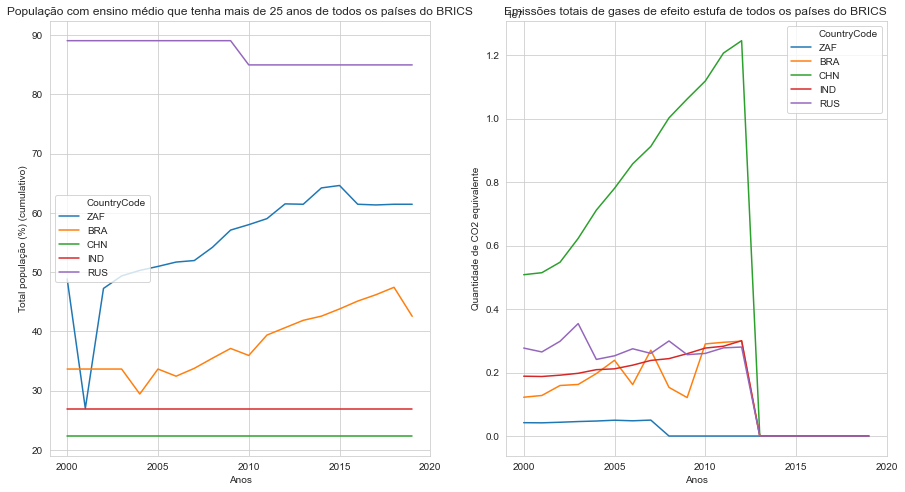

In [37]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='Value_medio_completo', data=pergunta1, ci=None, hue='CountryCode', estimator=None)
plt.title('População com ensino médio que tenha mais de 25 anos de todos os países do BRICS')
plt.xlabel('Anos')
plt.ylabel('Total população (%) (cumulativo)')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='Value_efeito_estufa', data=pergunta1, ci=None, hue='CountryCode', estimator=None)
plt.title('Emissões totais de gases de efeito estufa de todos os países do BRICS ')
plt.xlabel('Anos')
plt.ylabel('Quantidade de CO2 equivalente')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

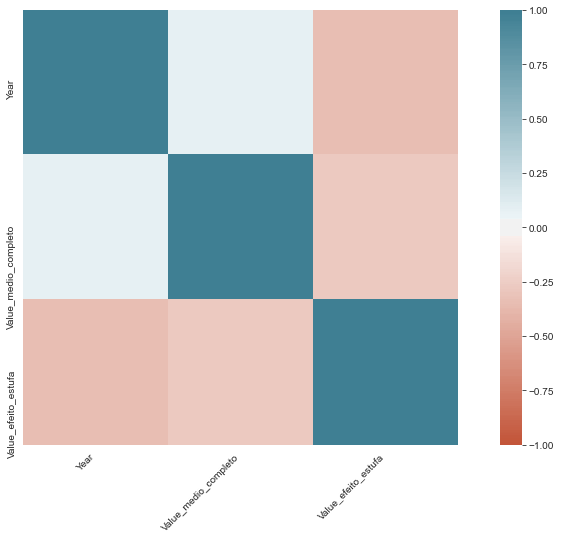

In [38]:
plt.figure(figsize=(15,8))
corr = pergunta1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [39]:
corr

,Year,Value_medio_completo,Value_efeito_estufa
Year,1.000000,0.082844,-0.343878
Value_medio_completo,0.082844,1.000000,-0.280843
Value_efeito_estufa,-0.343878,-0.280843,1.000000


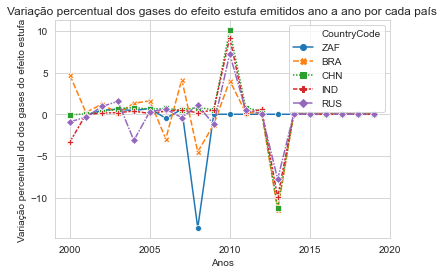

In [40]:
pergunta1['%_variacao_efeito_estufa'] = 100 * pergunta1['Value_efeito_estufa'] / pergunta1.groupby('CountryCode')['Value_efeito_estufa'].transform('sum')
pergunta1['%_variacao_efeito_estufa'] = pergunta1['%_variacao_efeito_estufa'].diff()
sns.lineplot(y='%_variacao_efeito_estufa', x='Year', data=pergunta1, hue='CountryCode', ci=None, markers=True, style='CountryCode', dashes=True)
plt.title('Variação percentual dos gases do efeito estufa emitidos ano a ano por cada país')
plt.xlabel('Anos')
plt.ylabel('Variação percentual do dos gases do efeito estufa')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

<h1>Observação</h1>
<br>
<br>
Foi visto que não será possível ser analisado a China e a Índia, pois eles possuíam apenas 1 ano de dados para o total de 20 anos na variável ensino médio. Quando tratamos os dados, eles acabaram virando uma constante justamente por isso.
<br>
A Rússia é possível ser analisado, pois haviam 1 dado para cada década na variável ensino médio, o que nos dá uma ídeia do nível educacional para cada época.
<br>
Mas se formos analisar de maneira geral, comparando os dois gráficos de linha, junto com o mapa de calor que mostra a correlação entre as variáveis 'Year', 'Value_ensino_medio' e 'Value_efeito_estufa', não evidencia uma grande correlação entre a variável de ensino médio e do efeito estufa, apesar de haver alguma e de forma inversamente proporcional, pois quanto mais próximo do 0 este número, menos correlação possui. Parece haver outros fatores mais determinantes do que a educação para isso, acredito que mais <b>fatores políticos do que educacionais da população</b>, mas não abrange o nosso estudo.

<h1>Segunda pergunta</h1>
<br>
<br>
Partiremos agora para a segunda pergunta.
<br>
<br>
A renda per Capita aumentou na mesma proporção que o acesso a eletricidade, mostrando uma correlação?
<br>
Para responder esta pergunta, filtrei a variável que mostra a porcentagem total da população que possui eletricidade e a outra variável refere-se ao crescimento percentual do PIB per Capita por ano.

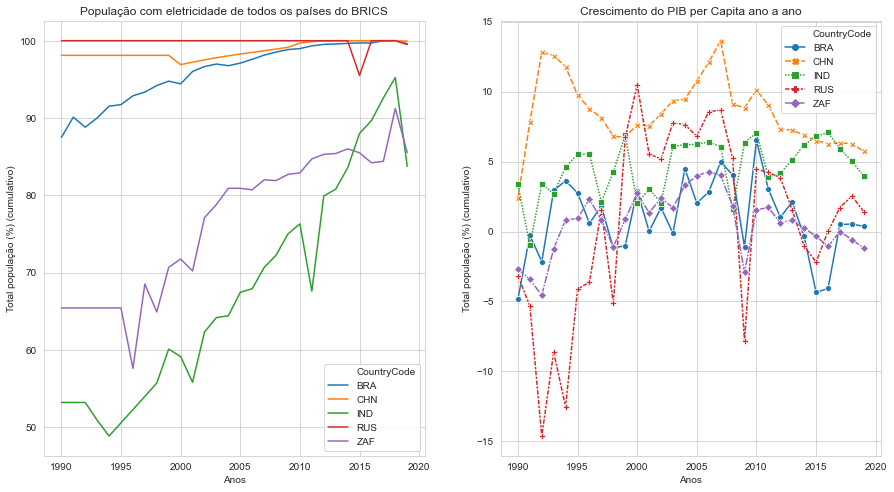

In [41]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='Value_eletricidade', data=pergunta2, ci=None, hue='CountryCode', estimator=None)
plt.title('População com eletricidade de todos os países do BRICS')
plt.xlabel('Anos')
plt.ylabel('Total população (%) (cumulativo)')
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='Value_pib', data=pergunta2, ci=None, hue='CountryCode', estimator=None, markers=True, style='CountryCode', dashes=True)
plt.title('Crescimento do PIB per Capita ano a ano')
plt.xlabel('Anos')
plt.ylabel('Total população (%) (cumulativo)')
plt.show()

In [42]:
pergunta2.corr()

,Year,Value_pib,Value_eletricidade
Year,1.000000,0.135176,0.338057
Value_pib,0.135176,1.000000,0.085317
Value_eletricidade,0.338057,0.085317,1.000000


<h1>Observação</h1>
<br>
<br>
Percebe-se pelos dois gráficos e pela tabela de correlação que não há nenhum indício de que as variáveis eletricidade e PIB per Capita possuam alguma correlação. Os dois países que nos mostram isso são a Índia e África do Sul, pois tiveram um aumento gradual durante 1990 e 2019 de eletricidade, porém o PIB teve uma variação enorme neste período, não acompanhando a tendência crescente da outra variável.

<h1>Terceira pergunta</h1>
<br>
<br>
Segue agora a terceira pergunta.
<br>
<br>
Quando a educação é elevada, a Renda per Capita também será? 
<br>
<br>
Para responder isso, filtrei a variável que informa o nível educacional, pelo menos concluído o ensino superior de curta duração, população com mais de 25 anos, total (%) (cumulativo) e a outra variável refere-se novamente ao crescimento percentual do PIB per Capita por ano.
<br>
Levei em conta a variável de ensino superior para se ter um mínimo de escolaridade avançada.

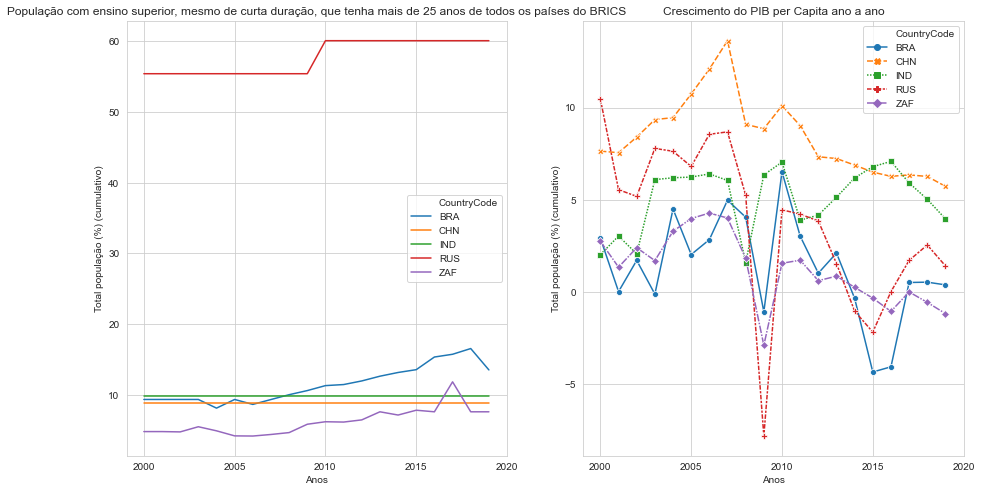

In [43]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year', y='Value_ensino_superior', data=pergunta3, ci=None, hue='CountryCode', estimator=None)
plt.title('População com ensino superior, mesmo de curta duração, que tenha mais de 25 anos de todos os países do BRICS')
plt.xlabel('Anos')
plt.ylabel('Total população (%) (cumulativo)')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.subplot(1,2,2)
sns.lineplot(x='Year', y='Value_pib', data=pergunta3, ci=None, hue='CountryCode', estimator=None, markers=True, style='CountryCode', dashes=True)
plt.title('Crescimento do PIB per Capita ano a ano')
plt.xlabel('Anos')
plt.ylabel('Total população (%) (cumulativo)')
plt.xticks([2000, 2005, 2010, 2015, 2020])
plt.show()

In [44]:
pergunta3.corr()

,Year,Value_pib,Value_ensino_superior
Year,1.000000,-0.293688,0.058138
Value_pib,-0.293688,1.000000,-0.054600
Value_ensino_superior,0.058138,-0.054600,1.000000


<h1>Observação</h1>
<br>
<br>
A mesma observação feita na variável de ensino médio da primeira pergunta, é feita na variável ensino superior da terceira pergunta.
<br>
Mas se formos analisar de maneira geral, comparando os dois gráficos de linha, junto com a tabela que nos mostra a correlação entre as variáveis 'Year', 'Value_ensino_superior' e 'Value_pib', não nos mostra nenhuma correlação. 